In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df=pd.read_csv('yelp_training_set_review.csv')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229907 entries, 0 to 229906
Data columns (total 32 columns):
Unnamed: 0                229907 non-null int64
business_blank            229907 non-null bool
business_categories       229130 non-null object
business_city             229907 non-null object
business_full_address     229907 non-null object
business_id               229907 non-null object
business_latitude         229907 non-null float64
business_longitude        229907 non-null float64
business_name             229907 non-null object
business_neighborhoods    0 non-null float64
business_open             229907 non-null bool
business_review_count     229907 non-null int64
business_stars            229907 non-null float64
business_state            229907 non-null object
business_type             229907 non-null object
cool                      229907 non-null int64
date                      229907 non-null object
funny                     229907 non-null int64
review_id       

In [71]:
len(df['business_city'].unique())

61

In [72]:
df.isnull().sum()

Unnamed: 0                     0
business_blank                 0
business_categories          777
business_city                  0
business_full_address          0
business_id                    0
business_latitude              0
business_longitude             0
business_name                  0
business_neighborhoods    229907
business_open                  0
business_review_count          0
business_stars                 0
business_state                 0
business_type                  0
cool                           0
date                           0
funny                          0
review_id                      0
reviewer_average_stars         0
reviewer_blank                 0
reviewer_cool                  0
reviewer_funny                 0
reviewer_name              14028
reviewer_review_count          0
reviewer_type                  0
reviewer_useful                0
stars                          0
text                           6
type                           0
useful    

In [73]:
df.drop(columns=['business_neighborhoods','reviewer_name'],inplace=True)

In [74]:
df.dropna(inplace=True,axis=0)
#keep only open businesses
df=df[df['business_open']==True]
# keep only restaurants
df = df[df['business_categories'].str.contains("Restaurants")]

In [75]:
df.describe()

,Unnamed: 0,business_latitude,business_longitude,business_review_count,business_stars,cool,funny,reviewer_average_stars,reviewer_cool,reviewer_funny,reviewer_review_count,reviewer_useful,stars,useful
count,143896.000000,143896.000000,143896.000000,143896.000000,143896.000000,143896.000000,143896.000000,143896.000000,143896.000000,143896.000000,143896.000000,143896.000000,143896.000000,143896.000000
mean,114871.238881,33.484047,-111.984592,146.843498,3.768451,0.796075,0.627245,3.535019,205.534893,167.624208,106.837633,293.427364,3.757575,1.322900
std,66287.524956,0.109515,0.122446,149.992084,0.488895,1.829917,1.695156,1.038671,803.035217,657.954649,187.447953,970.411696,1.176526,2.133145
min,0.000000,32.876848,-112.875482,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,57557.250000,33.421909,-112.065458,44.000000,3.500000,0.000000,0.000000,3.430000,2.000000,1.000000,9.000000,7.000000,3.000000,0.000000
50%,114940.500000,33.492502,-111.964173,95.500000,4.000000,0.000000,0.000000,3.740000,12.000000,11.000000,34.000000,37.000000,4.000000,1.000000
75%,172219.500000,33.538102,-111.923099,192.000000,4.000000,1.000000,1.000000,4.010000,80.000000,62.000000,125.000000,173.000000,5.000000,2.000000
max,229905.000000,34.002867,-111.386046,803.000000,5.000000,77.000000,70.000000,5.000000,22410.000000,24519.000000,2810.000000,24293.000000,5.000000,82.000000


In [76]:
#choosing relevant columns
df1=df[['business_city','business_name', 'stars','reviewer_review_count','text', 'user_id', 'cool',
       'useful', 'funny','business_latitude','business_longitude']]



In [77]:
df1.reset_index(drop=True)




,business_city,business_name,stars,reviewer_review_count,text,user_id,cool,useful,funny,business_latitude,business_longitude
0,Phoenix,Morning Glory Cafe,5,376,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,33.390792,-112.012504
1,Phoenix,Spinato's Pizzeria,5,2,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,33.305607,-111.978758
2,Tempe,Haji-Baba,4,3,love the gyro plate. Rice is so good and I als...,0hT2KtfLiobPvh6cDC8JQg,0,1,0,33.414345,-111.913031
3,Phoenix,Quiessence Restaurant,4,654,"Quiessence is, simply put, beautiful. Full wi...",sqYN3lNgvPbPCTRsMFu27g,4,3,1,33.390792,-112.012504
4,Phoenix,La Condesa Gourmet Taco Shop,5,295,Drop what you're doing and drive here. After I...,wFweIWhv2fREZV_dYkz_1g,7,7,4,33.469132,-112.047512
...,...,...,...,...,...,...,...,...,...,...,...
143891,Phoenix,Breadcrafters Bakery & Cafe,2,169,"No, we just stopped serving breakfast.\nThe on...",UoBfwbXaixelZBghbJ2cSg,3,4,2,33.603263,-111.978179
143892,Scottsdale,Cowboy Ciao,2,12,I have been wanting to try Cowboy Ciao for a w...,tTO6rv0Z9aNNYmmZU_BR4g,0,0,0,33.499499,-111.927402
143893,Phoenix,Over Easy,1,114,The coffee was good.\nI had the two egg breakf...,CAlxnkAuqNetlUmWtCQ_eQ,0,2,0,33.494820,-111.979821
143894,Tempe,Boulders On Broadway,4,4,Cool atmosphere. A lot of beers on tap and goo...,M5wHt6Odh1k5v0tIjqd8DQ,0,0,0,33.407561,-111.947525


In [78]:
#dropped rows with NaN REVIEWS



df1.dropna(subset=['text'],inplace=True,axis=0)

C:\Users\Vibha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [79]:
#new column to find length of review text

df1['text_length'] = df1['text'].apply(len)

C:\Users\Vibha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
#Total number of retaurants

a=df1['business_name'].unique()

print("Total number of restaurants",len(a))

Total number of restaurants 2340


In [81]:
#Top 10 Restaurants which have got the most reviews 
df1['business_name'].value_counts()[:10]

Pita Jungle                  1275
Oregano's Pizza Bistro        960
Cornish Pasty Company         907
Pizzeria Bianco               794
Lo-Lo's Chicken & Waffles     794
Four Peaks Brewing Co         731
Matt's Big Breakfast          679
Chino Bandido                 655
FEZ                           645
True Food Kitchen             640
Name: business_name, dtype: int64

In [119]:
df1[df1['stars']==5]['business_name'].value_counts()

Cornish Pasty Company        478
Pita Jungle                  419
Oregano's Pizza Bistro       374
Pizzeria Bianco              363
Lo-Lo's Chicken & Waffles    353
                            ... 
Pepe's Taco Shoppe             1
Little Jamaica                 1
Mercer's Restaurant            1
Our House                      1
Great Dragon Restaurant        1
Name: business_name, Length: 2058, dtype: int64

In [120]:
df1[df1['stars']==1]['business_name'].value_counts()

RA Sushi Bar Restaurant                  88
Arriba Mexican Grill                     79
McDonald's                               66
Stingray Sushi                           51
Jimmy John's                             49
                                         ..
Sofia's Mexican Food                      1
El Charrito Authentic Mexican Cuisine     1
Bobo China                                1
Fox Hound Smokehouse & Tavern             1
Old Pueblo Restaurant                     1
Name: business_name, Length: 1717, dtype: int64

In [106]:
#KS test
#p value is less than 0.5 so myy two columns have different distribution
from scipy.stats import ks_2samp
import numpy as np

x = df1['stars'][:10000]
y = df1['useful'][:10000]
ks_2samp(x, y)

Ks_2sampResult(statistic=0.6853, pvalue=0.0)

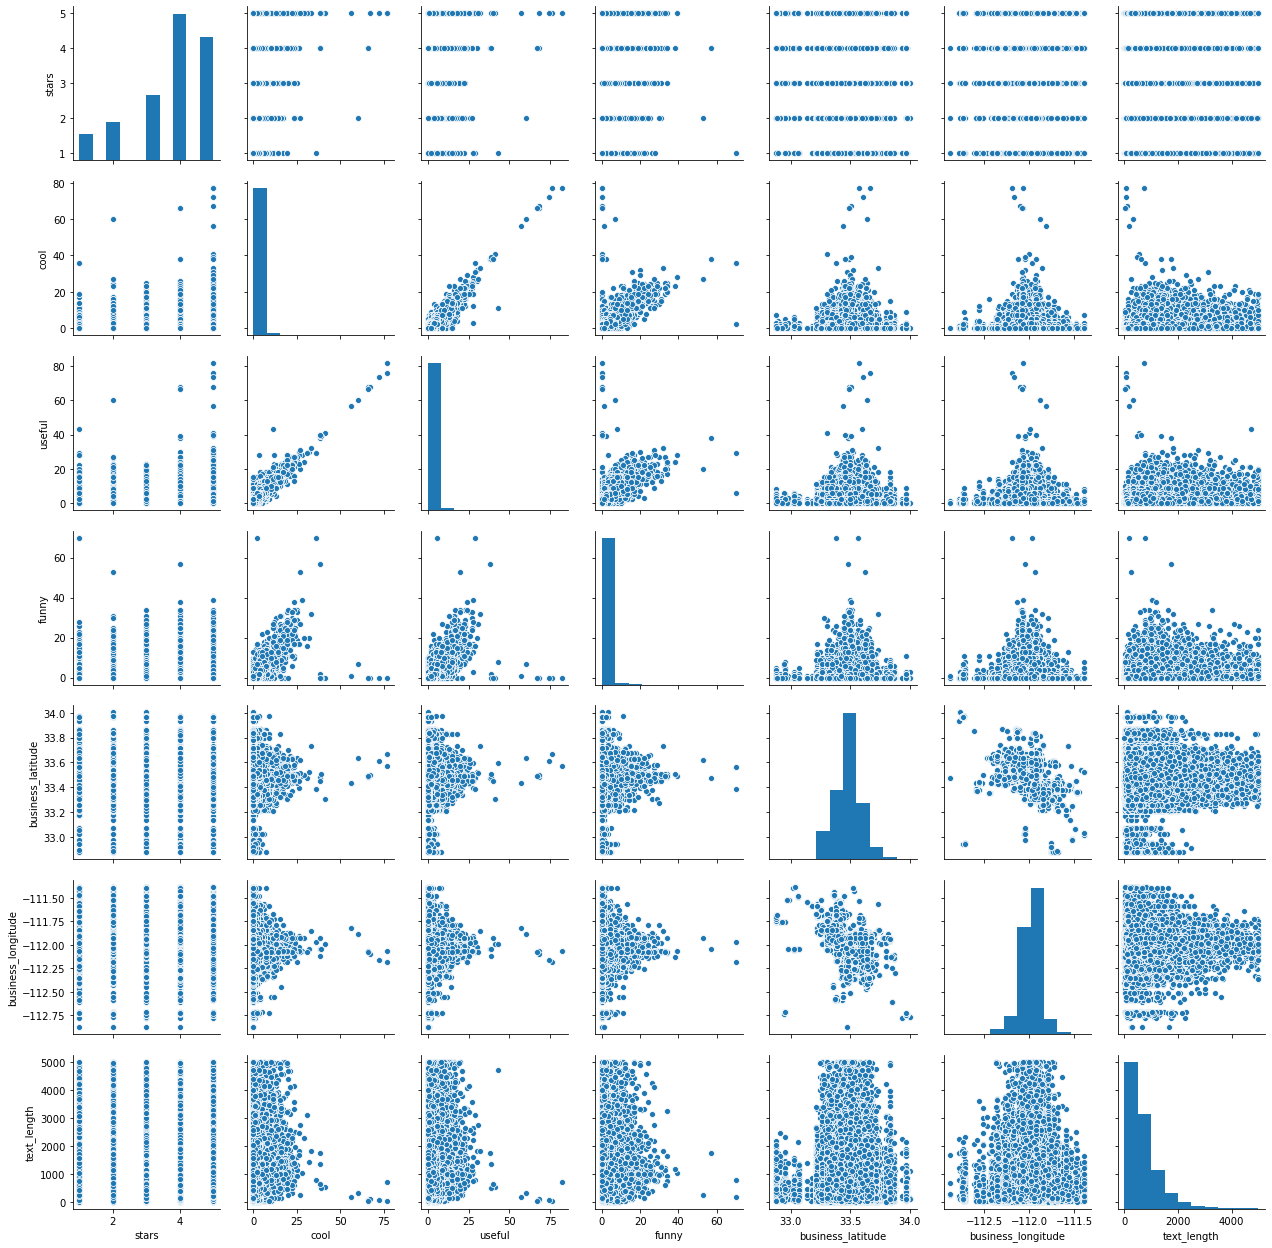

In [50]:
import seaborn as sns
sns.pairplot(df1)

In [54]:
#overview of reviews

useful_reviews = len(df1[df1["useful"]>0])
cool_reviews = len(df1[df1["cool"]>0])
funny_reviews = len(df1[df1["funny"]>0])
negative_reviews = len(df1[df1["stars"]<=2])
positive_reviews =len(df1[df1["stars"]>=3])
total_reviews = len(df1)

print("Total reviews: {}".format(total_reviews))
print("Useful reviews: {}".format(useful_reviews))
print("Funny reviews: {}".format(funny_reviews))
print("Cool reviews: {}".format(cool_reviews))
print("Total negative reviews: {}".format(negative_reviews))
print("Total positive reviews: {}".format(positive_reviews))

Total reviews: 143896
Useful reviews: 83541
Funny reviews: 40445
Cool reviews: 51355
Total negative reviews: 23162
Total positive reviews: 120734


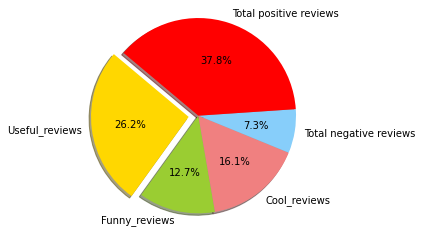

In [55]:
labels = 'Useful_reviews', 'Funny_reviews', 'Cool_reviews', 'Total negative reviews','Total positive reviews'
sizes = [useful_reviews, funny_reviews, cool_reviews, negative_reviews,positive_reviews]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
explode = (0.1, 0, 0, 0,0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [57]:
#top reviewed restaurants

top_reviewed = df1[df1["stars"]>=3]['business_name']
top_reviewed


0                         Morning Glory Cafe
1                         Spinato's Pizzeria
2                                  Haji-Baba
5                      Quiessence Restaurant
6               La Condesa Gourmet Taco Shop
                         ...                
229891        Uncle Sal's Italian Restaurant
229893                          Claim Jumper
229894                  Yen Sushi & Sake Bar
229904                  Boulders On Broadway
229905    La Bocca Urban Pizzeria + Wine Bar
Name: business_name, Length: 120734, dtype: object

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

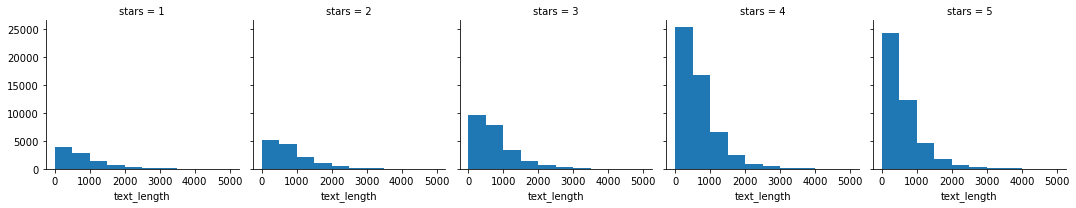

In [107]:
#5 histograms of text length based off of the star ratings
#since the pattern is the same, we can conclude that quantity does not matter but quality matters

g = sns.FacetGrid(df1, col = 'stars')
g.map(plt.hist, 'text_length')


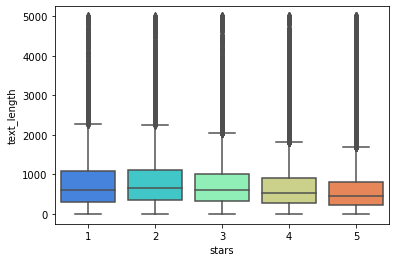

In [114]:
import seaborn as sns
#box plot of text length for each star rating
#shows the skewness

sns.boxplot(x = 'stars', y = 'text_length', data = df1, palette = 'rainbow')

In [118]:
#Spearman’s Rank Correlation

from scipy.stats import spearmanr
data1 = df1['text_length']
data2 = df1['useful']
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.328, p=0.000
Probably dependent


In [83]:
stars = df1.groupby('stars').sum()
stars

,cool,useful,funny,text_length
stars,,,,
1,9523,27347,16290,14823489
2,15268,32571,18711,18086946
3,30097,48266,27064,27365252
4,76928,109998,54090,54783536
5,67797,100658,44557,47650805


In [85]:
stars = df1.groupby('stars').mean()
stars

,cool,useful,funny,text_length
stars,,,,
1,0.543674,1.561258,0.930007,846.282770
2,0.728539,1.554182,0.892828,863.050341
3,0.851135,1.364950,0.765363,773.882300
4,0.963105,1.377127,0.677183,685.865865
5,0.889818,1.321110,0.584799,625.404308


In [26]:
df1.corr()

,stars,cool,useful,funny,text_length
stars,1.000000,0.046275,-0.032726,-0.060046,-0.129132
cool,0.046275,1.000000,0.877288,0.777112,0.257747
useful,-0.032726,0.877288,1.000000,0.726362,0.305979
funny,-0.060046,0.777112,0.726362,1.000000,0.244194
text_length,-0.129132,0.257747,0.305979,0.244194,1.000000


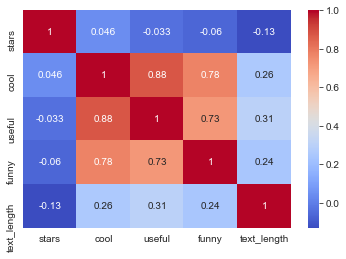

In [90]:
sns.heatmap(df1.corr(), cmap = 'coolwarm', annot = True)